In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from joblib import dump, load
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("car details.csv")

print(df.head())

                       name  year  selling_price  km_driven    fuel  \
0             Maruti 800 AC  2007          60000      70000  Petrol   
1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
3    Datsun RediGO T Option  2017         250000      46000  Petrol   
4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual   First Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual  Second Owner  


In [3]:
df.drop_duplicates(inplace=True)
df.drop(columns=["name"], inplace=True)

In [4]:
df["year"] = df["year"].astype(int)
df["km_driven"] = df["km_driven"].astype(int)
df["selling_price"] = df["selling_price"].astype(float)

In [5]:
numeric_features = ["year", "km_driven"]
categorical_features = ["fuel", "seller_type", "transmission", "owner"]

In [6]:
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", MinMaxScaler()),
])

In [7]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

In [8]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
])

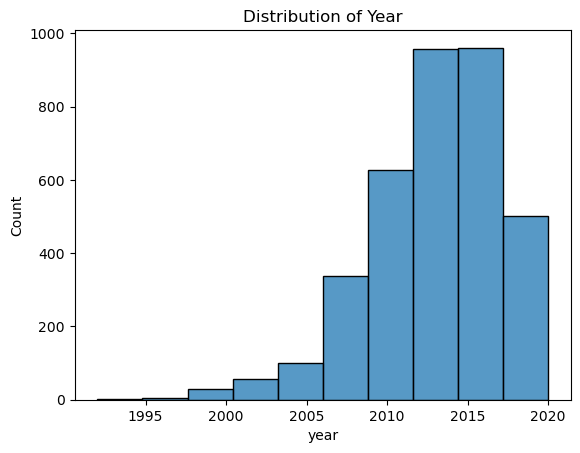

In [9]:
sns.histplot(df['year'], bins=10)
plt.title('Distribution of Year')
plt.show()

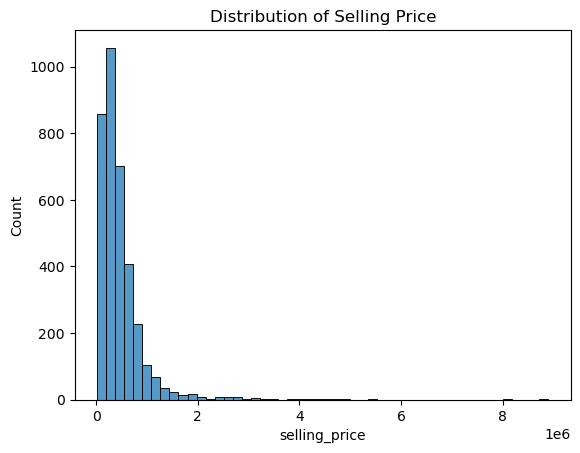

In [10]:
sns.histplot(df['selling_price'], bins=50)
plt.title('Distribution of Selling Price')
plt.show()

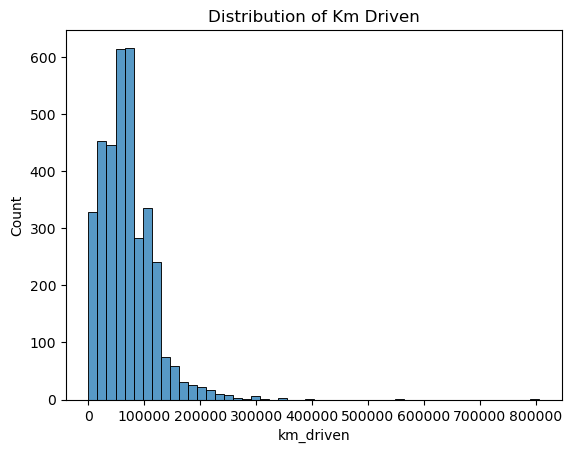

In [11]:
sns.histplot(df['km_driven'], bins=50)
plt.title('Distribution of Km Driven')
plt.show()

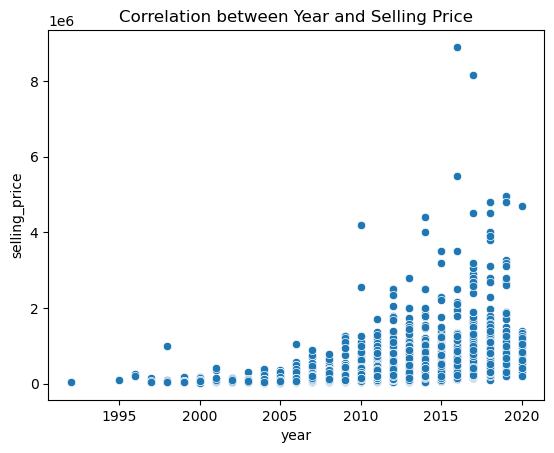

In [12]:
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Correlation between Year and Selling Price')
plt.show()

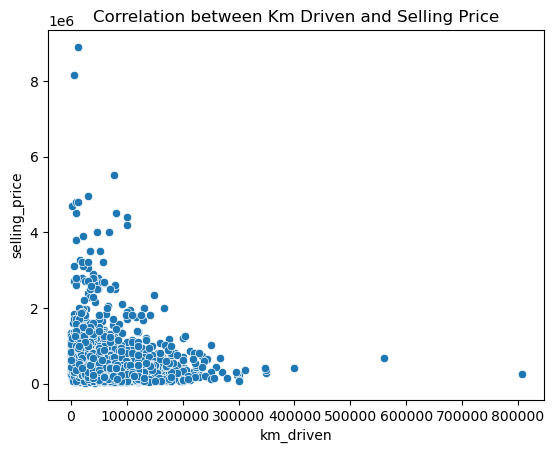

In [13]:
sns.scatterplot(x='km_driven', y='selling_price', data=df)
plt.title('Correlation between Km Driven and Selling Price')
plt.show()

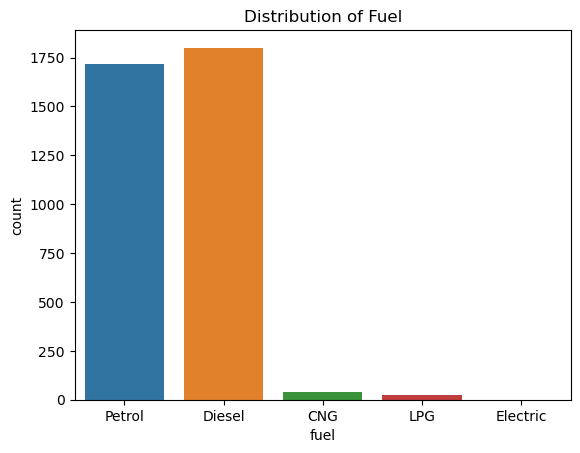

In [14]:
sns.countplot(x='fuel', data=df)
plt.title('Distribution of Fuel')
plt.show()

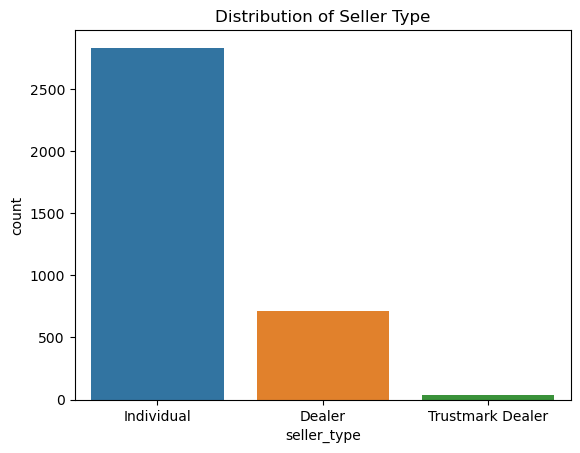

In [15]:
sns.countplot(x='seller_type', data=df)
plt.title('Distribution of Seller Type')
plt.show()

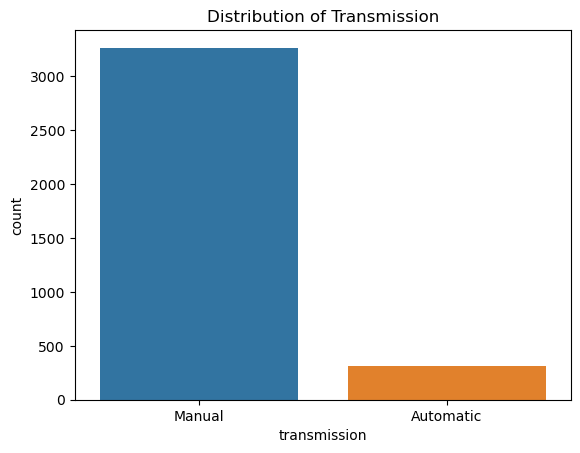

In [16]:
sns.countplot(x='transmission', data=df)
plt.title('Distribution of Transmission')
plt.show()

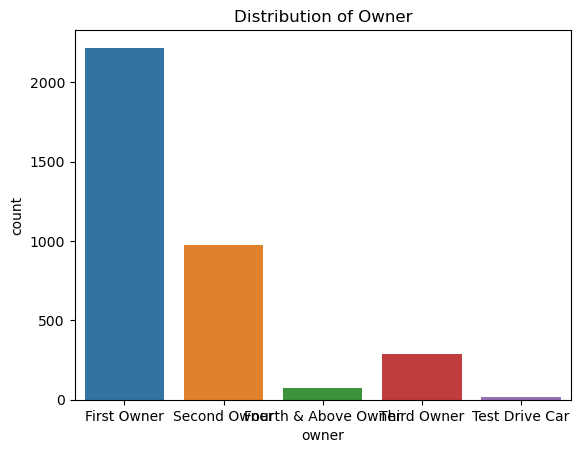

In [17]:
sns.countplot(x='owner', data=df)
plt.title('Distribution of Owner')
plt.show()

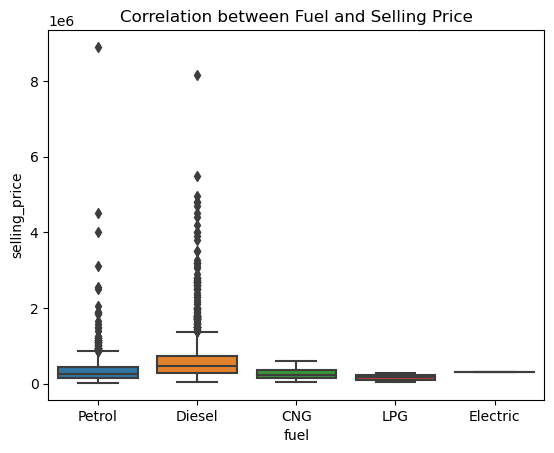

In [18]:
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Correlation between Fuel and Selling Price')
plt.show()

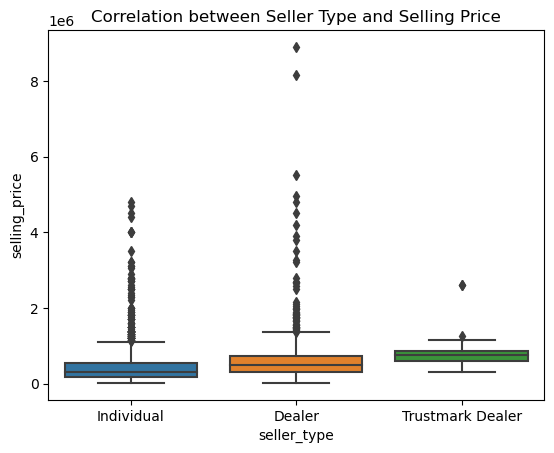

In [19]:
sns.boxplot(x='seller_type', y='selling_price', data=df)
plt.title('Correlation between Seller Type and Selling Price')
plt.show()

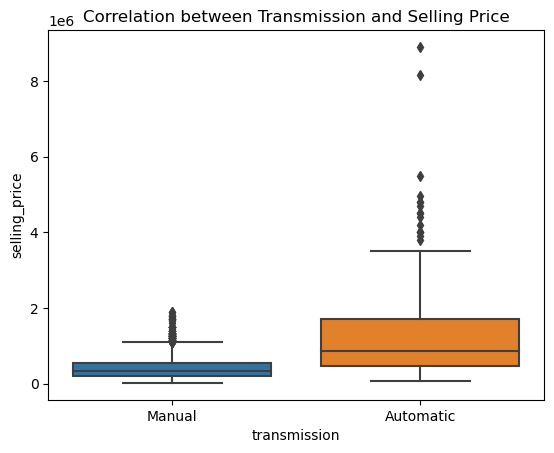

In [20]:
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Correlation between Transmission and Selling Price')
plt.show()

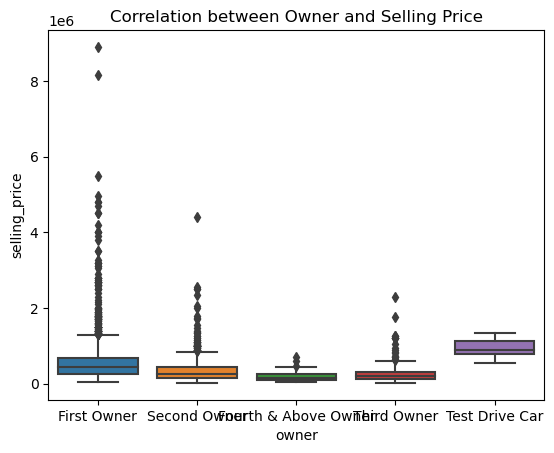

In [21]:
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Correlation between Owner and Selling Price')
plt.show()

In [22]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
}

In [23]:
for name, model in models.items():
    X = df.drop("selling_price", axis=1)
    y = df["selling_price"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name} MSE: {mse}, R^2: {r2}")
    # Save the model
    dump(model, f"{name}_model.joblib")

LinearRegression MSE: 195750605144.69662, R^2: 0.392330528921529
DecisionTreeRegressor MSE: 299341891257.3585, R^2: 0.07075164034599479
RandomForestRegressor MSE: 177610849424.1806, R^2: 0.44864185299652015


In [24]:
loaded_model = load("LinearRegression_model.joblib")

In [25]:
subset_df = df.sample(n=20, random_state=42)
X_subset = subset_df.drop("selling_price", axis=1)
y_subset = subset_df["selling_price"]
X_subset_processed = preprocessor.transform(X_subset)
y_pred = loaded_model.predict(X_subset_processed)
mse = mean_squared_error(y_subset, y_pred)
r2 = r2_score(y_subset, y_pred)
print(f"Performance on subset data (20 data points):")
print(f"MSE: {mse}, R^2: {r2}")

Performance on subset data (20 data points):
MSE: 277395122121.9106, R^2: 0.5322812284768045
